In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_points = 100
centers = [[-.5,.5],[.5,-.5]] # 클러스터의 중심이 될 점을 의미함. y값이 0인 건 [-.5,.5]가 중심인 애들을 말한다
X, y = datasets.make_blobs(n_samples=n_points, random_state=123, centers = centers, cluster_std = .4)
X_data = torch.Tensor(X)
y_data = torch.Tensor(y)

In [3]:
def scatter_plot():
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])

In [4]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x)) # linear 통과한 값에 activation func으로 sigmoid 적용
        return pred
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= .5:
            return 1
        else:
            return 0

In [5]:
torch.manual_seed(2)
model = Model(2, 1) # input개수, output 개수
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [6]:
[w, b] = model.parameters()
w1,w2 = w.view(2)
b1 = b[0]
def get_params():
    return (w1.item(),w2.item(),b1.item())

In [7]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1+b1)/ -w2
    scatter_plot()
    plt.plot(x1, x2,'r')

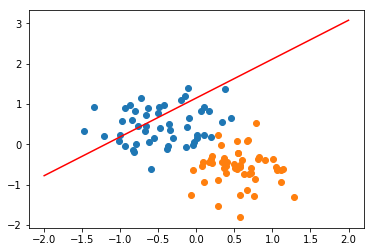

In [8]:
plot_fit('initial')

In [9]:
# Cross entropy 함수를 쓸 예정. 여기서는 2 class 분류이므로 binary cross entropy func 사용예정
criterion = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = .01)

In [10]:
epochs = 1000
losses=[]
for epoch in range(epochs):
    
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    print('epoch: ',epoch, " Loss: ", loss.item())
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch:  0  Loss:  0.6185115575790405
epoch:  1  Loss:  0.6174639463424683
epoch:  2  Loss:  0.6164201498031616
epoch:  3  Loss:  0.6153794527053833
epoch:  4  Loss:  0.614342451095581
epoch:  5  Loss:  0.6133086681365967
epoch:  6  Loss:  0.6122783422470093
epoch:  7  Loss:  0.6112515330314636
epoch:  8  Loss:  0.6102280616760254
epoch:  9  Loss:  0.6092080473899841
epoch:  10  Loss:  0.6081910729408264
epoch:  11  Loss:  0.6071775555610657
epoch:  12  Loss:  0.606167733669281
epoch:  13  Loss:  0.6051608324050903
epoch:  14  Loss:  0.604157567024231
epoch:  15  Loss:  0.6031574606895447
epoch:  16  Loss:  0.602160632610321
epoch:  17  Loss:  0.6011670827865601
epoch:  18  Loss:  0.6001767516136169
epoch:  19  Loss:  0.5991897583007812
epoch:  20  Loss:  0.5982059836387634
epoch:  21  Loss:  0.5972254276275635
epoch:  22  Loss:  0.5962479114532471
epoch:  23  Loss:  0.5952739119529724
epoch:  24  Loss:  0.5943028926849365
epoch:  25  Loss:  0.5933352112770081
epoch:  26  Loss:  0.59237

/anaconda3/envs/python3/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


epoch:  65  Loss:  0.5570977330207825
epoch:  66  Loss:  0.5562503933906555
epoch:  67  Loss:  0.5554057955741882
epoch:  68  Loss:  0.5545637011528015
epoch:  69  Loss:  0.5537243485450745
epoch:  70  Loss:  0.5528878569602966
epoch:  71  Loss:  0.5520538687705994
epoch:  72  Loss:  0.5512227416038513
epoch:  73  Loss:  0.5503939986228943
epoch:  74  Loss:  0.5495679378509521
epoch:  75  Loss:  0.5487444996833801
epoch:  76  Loss:  0.5479238629341125
epoch:  77  Loss:  0.5471054911613464
epoch:  78  Loss:  0.5462900400161743
epoch:  79  Loss:  0.5454771518707275
epoch:  80  Loss:  0.5446667671203613
epoch:  81  Loss:  0.5438589453697205
epoch:  82  Loss:  0.5430535674095154
epoch:  83  Loss:  0.5422506928443909
epoch:  84  Loss:  0.5414506196975708
epoch:  85  Loss:  0.5406527519226074
epoch:  86  Loss:  0.5398576855659485
epoch:  87  Loss:  0.5390648245811462
epoch:  88  Loss:  0.5382746458053589
epoch:  89  Loss:  0.5374867916107178
epoch:  90  Loss:  0.5367016792297363
epoch:  91  

epoch:  302  Loss:  0.4132422208786011
epoch:  303  Loss:  0.4128142297267914
epoch:  304  Loss:  0.4123874604701996
epoch:  305  Loss:  0.4119615852832794
epoch:  306  Loss:  0.4115370213985443
epoch:  307  Loss:  0.41111335158348083
epoch:  308  Loss:  0.4106908142566681
epoch:  309  Loss:  0.4102693796157837
epoch:  310  Loss:  0.40984898805618286
epoch:  311  Loss:  0.4094295799732208
epoch:  312  Loss:  0.4090113937854767
epoch:  313  Loss:  0.4085940420627594
epoch:  314  Loss:  0.40817803144454956
epoch:  315  Loss:  0.4077627658843994
epoch:  316  Loss:  0.40734875202178955
epoch:  317  Loss:  0.40693557262420654
epoch:  318  Loss:  0.40652379393577576
epoch:  319  Loss:  0.40611279010772705
epoch:  320  Loss:  0.40570271015167236
epoch:  321  Loss:  0.40529385209083557
epoch:  322  Loss:  0.40488600730895996
epoch:  323  Loss:  0.40447911620140076
epoch:  324  Loss:  0.4040732681751251
epoch:  325  Loss:  0.4036683142185211
epoch:  326  Loss:  0.40326446294784546
epoch:  327  

epoch:  615  Loss:  0.31772562861442566
epoch:  616  Loss:  0.3175089955329895
epoch:  617  Loss:  0.317292720079422
epoch:  618  Loss:  0.3170766532421112
epoch:  619  Loss:  0.31686124205589294
epoch:  620  Loss:  0.31664618849754333
epoch:  621  Loss:  0.3164314329624176
epoch:  622  Loss:  0.3162170946598053
epoch:  623  Loss:  0.3160032331943512
epoch:  624  Loss:  0.3157895505428314
epoch:  625  Loss:  0.315576434135437
epoch:  626  Loss:  0.31536370515823364
epoch:  627  Loss:  0.3151513338088989
epoch:  628  Loss:  0.31493937969207764
epoch:  629  Loss:  0.3147277235984802
epoch:  630  Loss:  0.314516544342041
epoch:  631  Loss:  0.31430572271347046
epoch:  632  Loss:  0.31409528851509094
epoch:  633  Loss:  0.3138852119445801
epoch:  634  Loss:  0.3136756122112274
epoch:  635  Loss:  0.31346622109413147
epoch:  636  Loss:  0.3132573068141937
epoch:  637  Loss:  0.313048779964447
epoch:  638  Loss:  0.31284067034721375
epoch:  639  Loss:  0.31263285875320435
epoch:  640  Loss: 

epoch:  934  Loss:  0.2642287015914917
epoch:  935  Loss:  0.2640989422798157
epoch:  936  Loss:  0.2639692723751068
epoch:  937  Loss:  0.26383981108665466
epoch:  938  Loss:  0.26371049880981445
epoch:  939  Loss:  0.26358145475387573
epoch:  940  Loss:  0.26345258951187134
epoch:  941  Loss:  0.2633238136768341
epoch:  942  Loss:  0.263195276260376
epoch:  943  Loss:  0.2630668580532074
epoch:  944  Loss:  0.2629387378692627
epoch:  945  Loss:  0.26281073689460754
epoch:  946  Loss:  0.26268288493156433
epoch:  947  Loss:  0.2625553011894226
epoch:  948  Loss:  0.2624277174472809
epoch:  949  Loss:  0.2623004615306854
epoch:  950  Loss:  0.2621733546257019
epoch:  951  Loss:  0.26204633712768555
epoch:  952  Loss:  0.26191961765289307
epoch:  953  Loss:  0.2617930471897125
epoch:  954  Loss:  0.26166656613349915
epoch:  955  Loss:  0.2615402936935425
epoch:  956  Loss:  0.2614142596721649
epoch:  957  Loss:  0.2612883746623993
epoch:  958  Loss:  0.2611626386642456
epoch:  959  Loss

Text(0.5, 0, 'epochs')

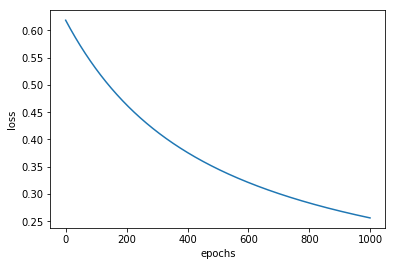

In [11]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epochs')

### Model Test 

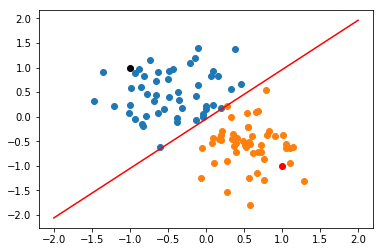

In [12]:
point1 = torch.Tensor([1.0,-1.0])
point2 = torch.Tensor([-1,1])
plt.plot(point1.numpy()[0], point1.numpy()[1],'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1],'ko')
plot_fit('trained_model')

In [13]:
print('red point prob: {}'.format(model.predict(point1))) # class 1로 분류
print('black point prob: {}'.format(model.predict(point2))) # class 0으로 분류

red point prob: 1
black point prob: 0
